In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
import warnings

warnings.filterwarnings("ignore")


In [ ]:
# Load CSV files for 2021 and 2022 data
data_2021 = pd.read_csv('student_responses_2021.csv')
data_2022 = pd.read_csv('student_responses_2022.csv')

# Add a 'year' column to each dataset to distinguish the years
data_2021['year'] = 2021
data_2022['year'] = 2022

# Combine both datasets
data = pd.concat([data_2021, data_2022], ignore_index=True)
display(data)



,student_id,question_id,ability,difficulty,answered_correctly,year
0,967,40,-0.320326,1.572793,False,2021
1,135,2,-2.897524,-1.920777,False,2021
2,553,18,-1.207800,-0.482901,False,2021
3,564,29,-2.012802,0.360224,False,2021
4,449,42,0.332158,1.211066,False,2021
...,...,...,...,...,...,...
94995,1402,13,0.460793,-1.077263,True,2022
94996,1954,19,4.303861,-0.319677,True,2022
94997,1763,39,-0.644500,0.947210,False,2022
94998,1632,4,NaN,-1.316538,True,2022


In [17]:
### 1. Exploratory Data Analysis (EDA) ###

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Summary statistics
print("\n\nDataset Summary:\n", data.describe())


Missing Values:
 student_id               0
question_id              0
ability               1900
difficulty            1900
answered_correctly       0
year                     0
dtype: int64


Dataset Summary:
          student_id   question_id       ability    difficulty  \
count  95000.000000  95000.000000  93100.000000  93100.000000   
mean    1026.815789     24.315789      0.154100      0.034364   
std      576.753180     13.822452      2.326674      1.120549   
min        1.000000      1.000000     -5.751698     -2.157522   
25%      528.000000     12.000000     -1.277524     -0.870725   
50%     1050.500000     24.000000      0.031228     -0.147794   
75%     1525.250000     36.000000      1.559546      1.069916   
max     2000.000000     50.000000      9.957734      2.194765   

       answered_correctly          year  
count        95000.000000  95000.000000  
mean             0.512505   2021.526316  
std              0.499846      0.499310  
min              0.000000   2021.0

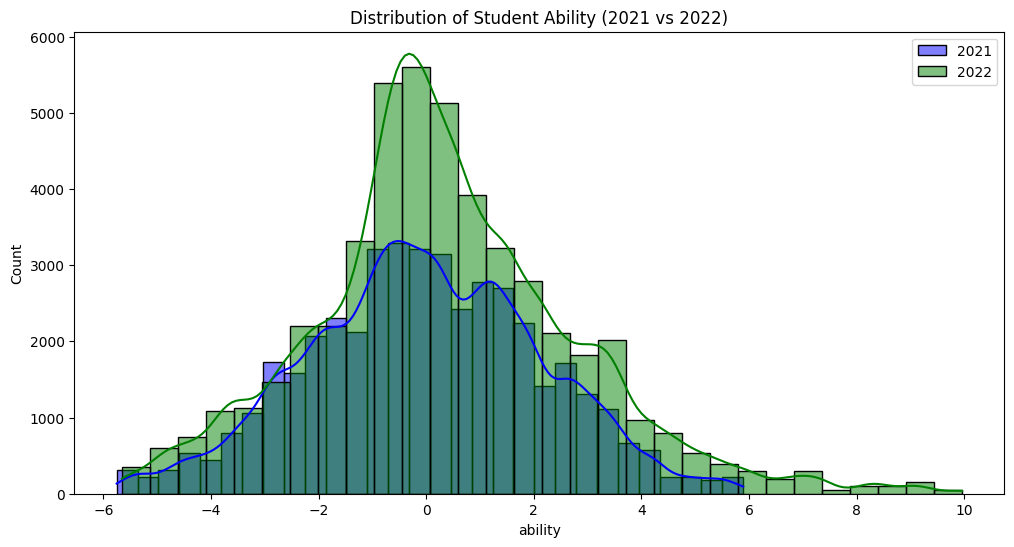

In [ ]:
# Distribution of Ability across years
plt.figure(figsize=(12, 6))
sns.histplot(data[data['year'] == 2021]['ability'], color='blue', kde=True, label='2021', bins=30)
sns.histplot(data[data['year'] == 2022]['ability'], color='green', kde=True, label='2022', bins=30)
plt.title("Distribution of Student Ability (2021 vs 2022)")
plt.legend()
plt.show()


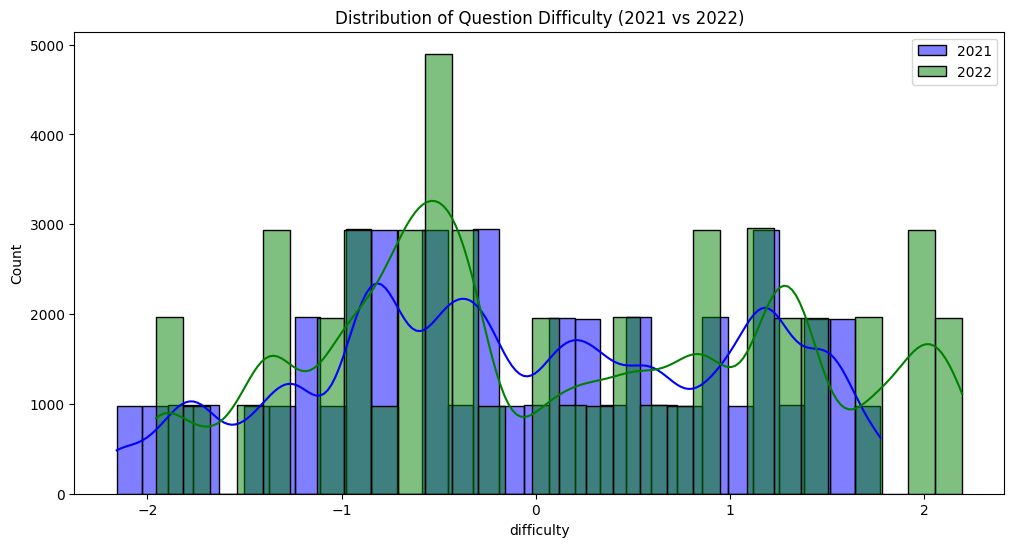

In [ ]:
# Distribution of Difficulty across years
plt.figure(figsize=(12, 6))
sns.histplot(data[data['year'] == 2021]['difficulty'], color='blue', kde=True, label='2021', bins=30)
sns.histplot(data[data['year'] == 2022]['difficulty'], color='green', kde=True, label='2022', bins=30)
plt.title("Distribution of Question Difficulty (2021 vs 2022)")
plt.legend()
plt.show()


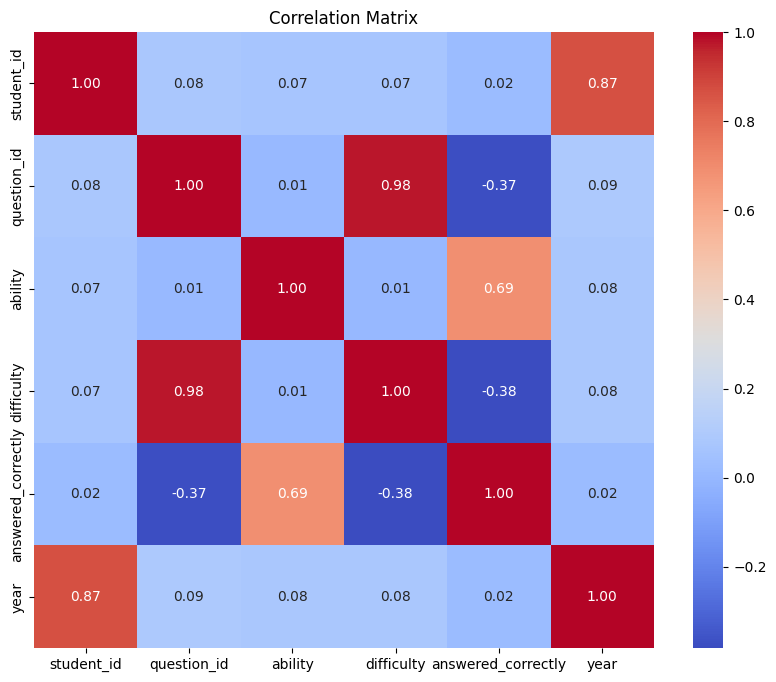

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


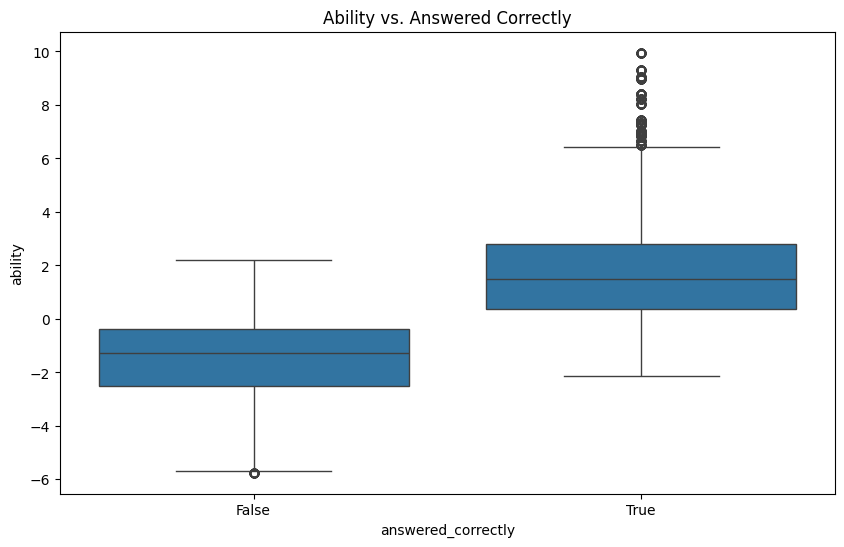

In [11]:

# Boxplot of ability by answered_correctly
plt.figure(figsize=(10, 6))
sns.boxplot(x='answered_correctly', y='ability', data=data)
plt.title("Ability vs. Answered Correctly")
plt.show()


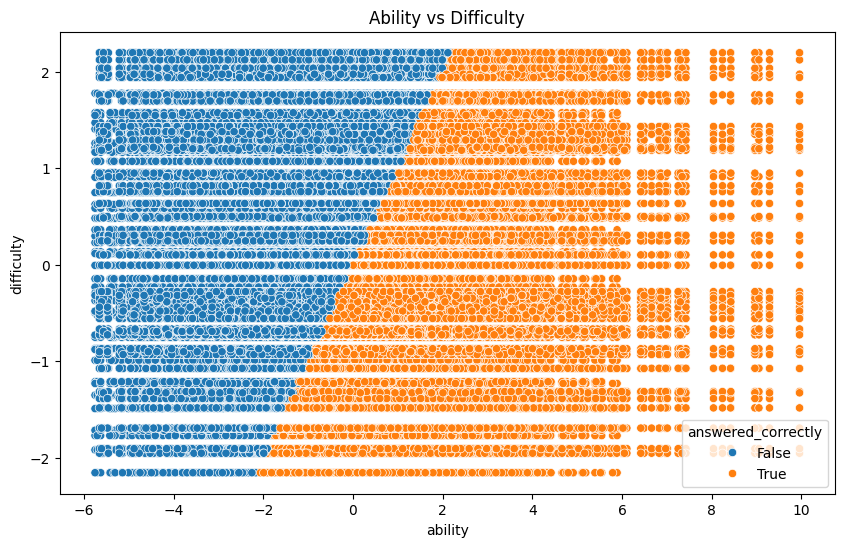

In [12]:

# Scatter plot for ability vs difficulty, colored by answered_correctly
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ability', y='difficulty', hue='answered_correctly', data=data)
plt.title("Ability vs Difficulty")
plt.show()


In [14]:

### 2. Hypothesis Testing ###

# Hypothesis 1: Did students' ability change from 2021 to 2022?
ability_2021 = data[data['year'] == 2021]['ability']
ability_2022 = data[data['year'] == 2022]['ability']
t_stat, p_val = stats.ttest_ind(ability_2021, ability_2022, nan_policy='omit')
print(f"Ability Change Test (2021 vs 2022): T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

# Hypothesis 2: Did question difficulty change from 2021 to 2022?
difficulty_2021 = data[data['year'] == 2021]['difficulty']
difficulty_2022 = data[data['year'] == 2022]['difficulty']
t_stat, p_val = stats.ttest_ind(difficulty_2021, difficulty_2022, nan_policy='omit')
print(f"Difficulty Change Test (2021 vs 2022): T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")


Ability Change Test (2021 vs 2022): T-statistic = -24.45, p-value = 0.0000
Difficulty Change Test (2021 vs 2022): T-statistic = -23.71, p-value = 0.0000


Ability Change Test (2021 vs 2022): The T-statistic of -24.45 and p-value of 0.0000 indicate a significant change in student ability between 2021 and 2022, with the null hypothesis rejected.

Difficulty Change Test (2021 vs 2022): The T-statistic of -23.71 and p-value of 0.0000 show a significant difference in question difficulty between the two years, leading to rejection of the null hypothesis.

Conclusion: Both student ability and question difficulty have significantly changed from 2021 to 2022.


Logistic Regression - Accuracy: 0.9869
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9221
           1       0.99      0.99      0.99      9779

    accuracy                           0.99     19000
   macro avg       0.99      0.99      0.99     19000
weighted avg       0.99      0.99      0.99     19000



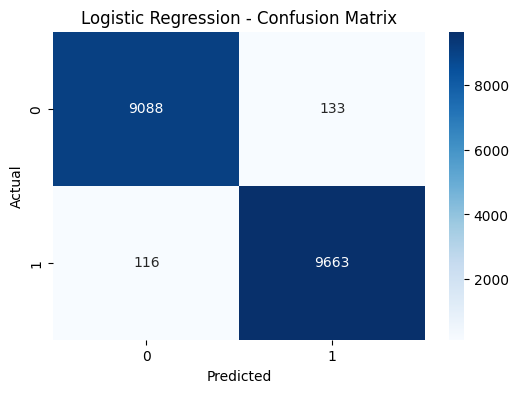


Random Forest - Accuracy: 0.9889
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9221
           1       0.99      0.99      0.99      9779

    accuracy                           0.99     19000
   macro avg       0.99      0.99      0.99     19000
weighted avg       0.99      0.99      0.99     19000



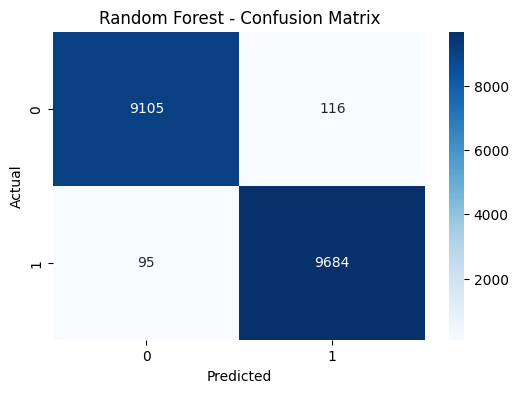

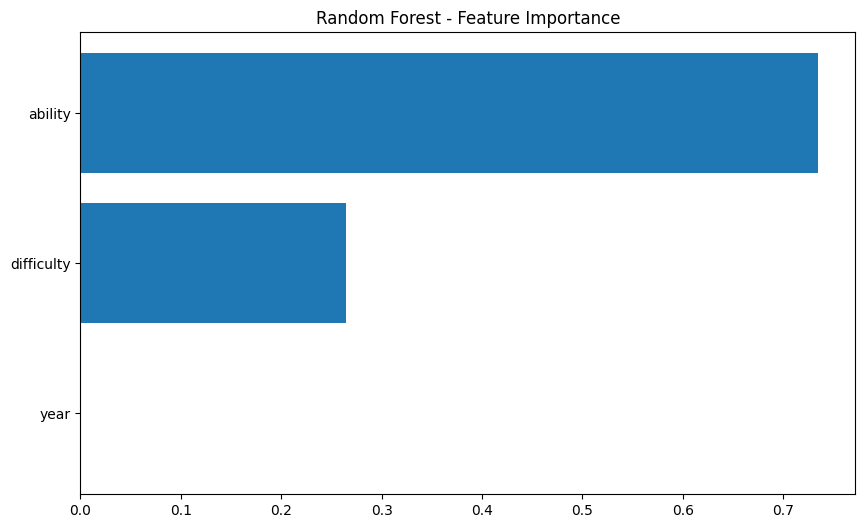


Gradient Boosting - Accuracy: 0.9849
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9221
           1       0.99      0.98      0.99      9779

    accuracy                           0.98     19000
   macro avg       0.98      0.98      0.98     19000
weighted avg       0.98      0.98      0.98     19000



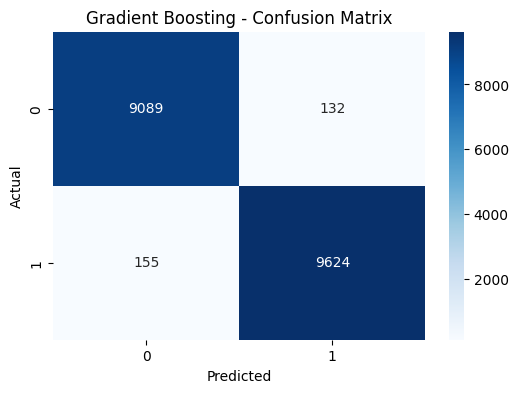

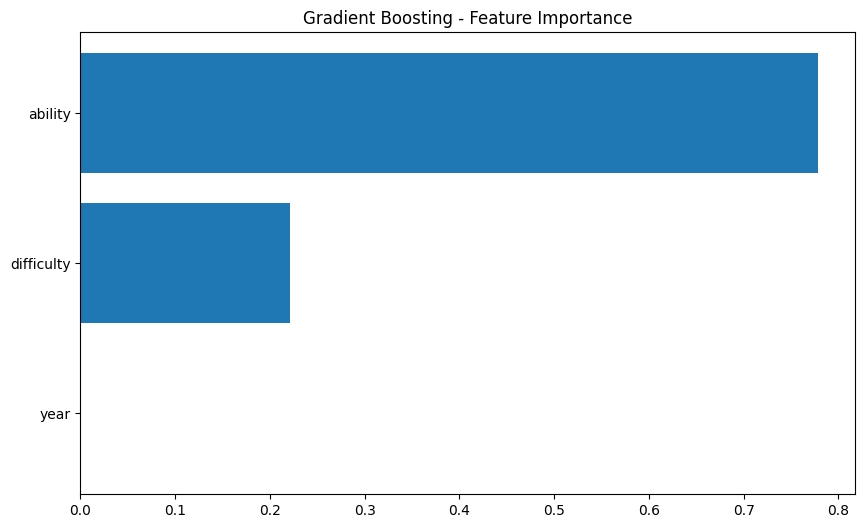

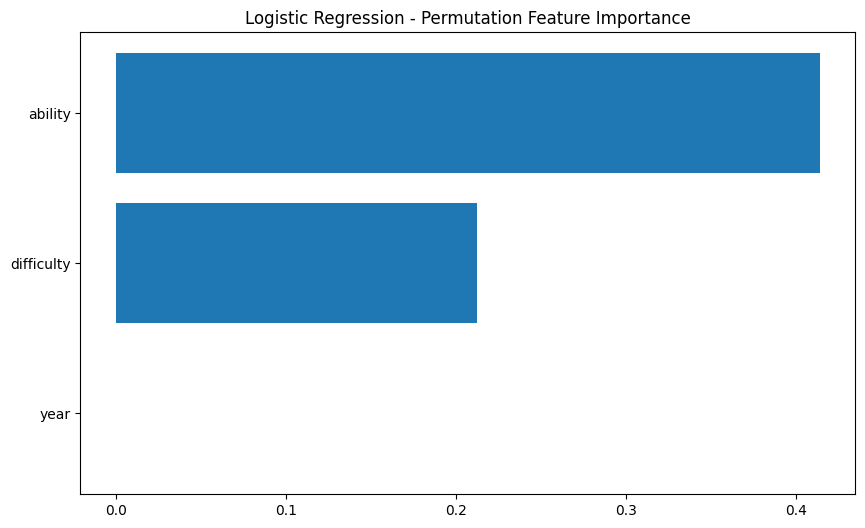

In [16]:
### 3. Modeling and Feature Importance ###

# Convert 'answered_correctly' to numeric (True/False to 1/0)
data['answered_correctly'] = data['answered_correctly'].astype(int)

# Define features and target
X = data[['ability', 'difficulty', 'year']]
y = data['answered_correctly']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate (with imputation)
models = {
    'Logistic Regression': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('scaler', StandardScaler()),                # Optional: scale features
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
}

# Fit each model and display performance metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} - Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Feature Importance (for tree-based models)
    if model_name in ['Random Forest', 'Gradient Boosting']:
        feature_importance = model.named_steps['classifier'].feature_importances_
        sorted_idx = np.argsort(feature_importance)
        plt.figure(figsize=(10, 6))
        plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
        plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
        plt.title(f"{model_name} - Feature Importance")
        plt.show()

### 4. Statistical Analysis and Reasoning ###

# Feature Importance using Permutation for Logistic Regression
if 'Logistic Regression' in models:
    result = permutation_importance(models['Logistic Regression'], X_test, y_test, n_repeats=10, random_state=42)
    sorted_idx = result.importances_mean.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(X.shape[1]), result.importances_mean[sorted_idx], align='center')
    plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
    plt.title("Logistic Regression - Permutation Feature Importance")
    plt.show()



Model Performance Summary:

Logistic Regression:
Accuracy: 98.69%
The model performs excellently, with both precision and recall close to 0.99 for both classes. The F1-score is also 0.99 for both classes, indicating a balanced and accurate model.

Random Forest:
Accuracy: 98.89%
Similar to Logistic Regression, Random Forest achieves high precision, recall, and F1-scores of 0.99 for both classes. The model also shows a slightly better accuracy than Logistic Regression, making it a very strong model for this task.

Gradient Boosting:
Accuracy: 98.49%
Gradient Boosting performs well but slightly lags behind Logistic Regression and Random Forest in terms of accuracy. The precision and recall are 0.99 for one class and 0.98 for the other, suggesting it may not be as balanced as the other models but still performs strongly.

Conclusion:
Random Forest provides the highest accuracy, followed closely by Logistic Regression. Both are strong models, with Gradient Boosting trailing slightly in performance. However, all three models achieve impressive results, making them suitable for this classification task.